In [8]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import qtensor.states as states 
import qtensor.operators as ops
from qtensor.simulation.finiteTDVP import tdvp, right_mpo_contractions, gs_evolve
import qtensor.simulation.finiteTDVP as sim
import qtensor.thermofield as thf 
import ncon

AttributeError: partially initialized module 'yaml' has no attribute 'error' (most likely due to a circular import)

Basic state

In [ ]:
N=10
D=6

psi = states.random_mps(N, 2, D, seed=42)
psi.right_canonical()

H = ops.tilted_ising(N=N)
H_term = ops.extensive_twosite_local_term(H, 3)

H_spin_up = ops.tilted_ising(J=0, h=1, g=0, N=N)


Simple TDVP

Initiating TDVP
TDVP finished!
Method: method_exact, Time taken: 3.17 seconds


c:\Users\osolomonstuke\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\osolomonstuke\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


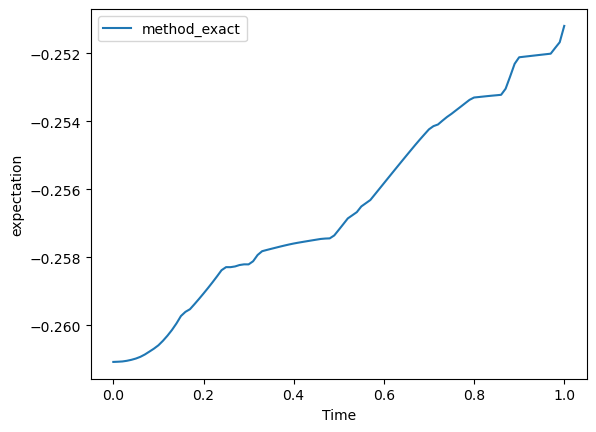

In [ ]:
import time

t_f = 1
steps = 100
methods = [sim.method_exact]

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('expectation')
for method in methods:
    psi_copy = copy.deepcopy(psi)
    ti = time.time()
    s_hist, _ = tdvp(psi_copy, H, t_f, steps, method=method, history=True)
    t_real = time.time() - ti
    print(f"Method: {str(method).split()[1]}, Time taken: {t_real:.2f} seconds")   
    t = list(s_hist.keys())
    expecs = [ops.local_expect(state, H_term) for state in s_hist.values()]
    ax.plot(t, expecs, label=str(method).split()[1])
ax.legend()


Ground state evolve

In [ ]:
psi = gs_evolve(psi, H_spin_up, 1000, 100)

Intial energy: (-0.24798775449688892+4.1199682554448774e-17j)
Initiating TDVP
TDVP finished!
Final energy: (-9.99999981771035+9.360645398083498e-16j)


Thermofield stuff

In [ ]:
N = 8
D = 8
H_usual = ops.tilted_ising(N=N)
beta = 1
H_th = thf.thermofield_hamiltonian(H_usual)


Intial energy: (0.020503272680248055+9.899102491720557e-17j)
Initiating TDVP
TDVP finished!
Final energy: (-7.9999961903288215+6.627345557524767e-16j)
Initiating TDVP
TDVP finished!
Energy at finite temperature: -7.685915299406381


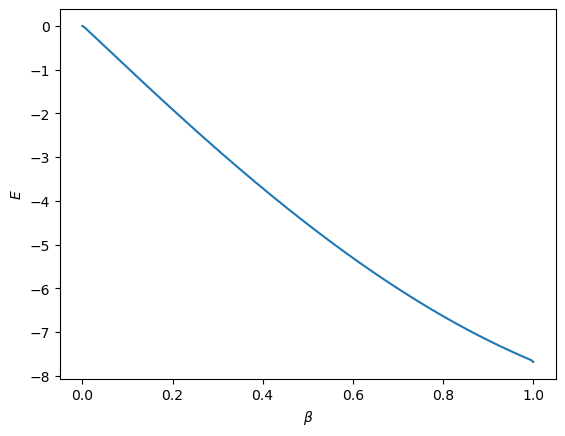

In [ ]:
beta_psi, times, energies = thf.finite_T_thermofield(beta, N, D, H_th, steps=200)

In [ ]:
# compare this to the groundstate energy
randpsi = states.random_mps(N, 2, D)
gs_evolve(randpsi, H_usual)

Intial energy: (-4.162048062445335-4.426325008087262e-16j)
Initiating TDVP
TDVP finished!
Final energy: (-9.590983998497517+3.469446951953614e-16j)


Testing near thermal ansatz builder

In [ ]:
N = 10
D = 8
H_usual = ops.tilted_ising(N=N)
H_tf = thf.thermofield_hamiltonian(H_usual)
H_middle = ops.extensive_twosite_local_term(H_tf, int((N-1)/2))

beta_avg = 0.05
delta_beta = 0.001
sigma = 1

NameError: name 'thf' is not defined

In [ ]:
inf_T_state = sim.inf_T_thermofield_variational(N, D)

NameError: name 'sim' is not defined

In [ ]:
even_state = thf.finite_T_thermofield(beta_avg, N, D, H_tf, initial_state=copy.deepcopy(inf_T_state))[0]

NameError: name 'thf' is not defined

In [ ]:
# gaussian profile ontop of an average, 
# with temp highest at centre,
# adjusted to have zero mean
d_beta_profile = delta_beta*np.exp(-(np.linspace(-N/2, N/2, N)**2)/(2*sigma**2))
d_beta_profile = d_beta_profile - np.mean(d_beta_profile)*np.ones(N)

beta_profile = beta_avg*np.ones(N) - d_beta_profile
 
profile_state = thf.near_thermal(H_tf, beta_profile, D, initial_state=copy.deepcopy(inf_T_state))

NameError: name 'delta_beta' is not defined

In [ ]:
# Checking energy along chain
local_energy = []
even_energy = []
sites = sorted(list(H_usual.sites))
local_ops = ops.extensive_as_terms(H_tf)
for term in local_ops:
    local_energy.append(ops.local_expect(profile_state, term))
    even_energy.append(ops.local_expect(even_state, term))

c:\Users\osolomonstuke\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\osolomonstuke\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Bond')

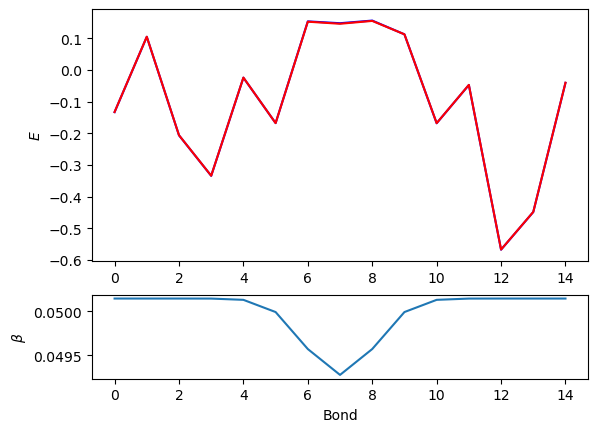

In [ ]:
fix, ax = plt.subplots(2, 1, height_ratios=[3, 1])
ax[0,].plot(sites[:-1], local_energy, color='b')
ax[0,].plot(sites[:-1], even_energy, color='r')
ax[0,].set_ylabel(r'$E$')
bond_profile = [np.sqrt(beta_profile[i]*beta_profile[i+1]) for i in range(N-1)]
ax[1,].plot(sites[:-1], bond_profile)
ax[1,].set_ylabel(r'$\beta$')
ax[1,].set_xlabel("Bond")

Do real time evolution on almost-thermal state

In [ ]:
initial_state = copy.deepcopy(profile_state)
t_f = 1.0
n_steps = 200
# evolved_state, expectations = sim.tdvp(initial_state, H_tf, t_f, n_steps, operators=local_ops)
evolved_state, expectations = sim.tdvp(initial_state, H_tf, t_f, n_steps, sim.method_exact, history=True, operators=[H_tf, H_middle])


Initiating TDVP


c:\Users\osolomonstuke\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\osolomonstuke\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Central $E$')

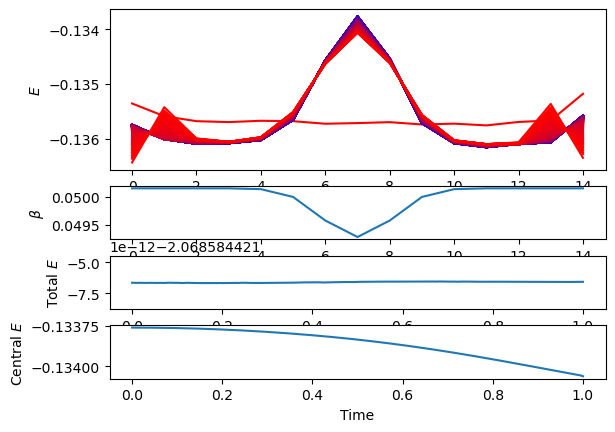

In [ ]:
fix, ax = plt.subplots(4, 1, height_ratios=[3, 1, 1, 1])
ax[0,].plot(sites[:-1], local_energy, color='b')
ax[0,].plot(sites[:-1], even_energy, color='r')
ax[0,].set_ylabel(r'$E$')
bond_profile = [np.sqrt(beta_profile[i]*beta_profile[i+1]) for i in range(N-1)]
ax[1,].plot(sites[:-1], bond_profile)
ax[1,].set_ylabel(r'$\beta$')
ax[1,].set_xlabel("Bond")


times = evolved_state.keys()
E_profile={}
for t in times:
    E_profile[t] = [ops.local_expect(evolved_state[t], op) for op in local_ops]
    ax[0,].plot(sites[:-1], E_profile[t], color=(t/t_f, 0, 1-t/t_f))

total_energy = [expectations[t][0] for t in times]
ax[2,].plot(times, total_energy)
ax[2,].set_xlabel("Time")
ax[2,].set_ylabel(r'Total $E$')

middle_energy = [expectations[t][1] for t in times]
ax[3,].plot(times, middle_energy)
ax[3,].set_xlabel("Time")
ax[3,].set_ylabel(r'Central $E$')


(4.0, 12.0)